In [1]:
# Imports
import pandas as pd # To read the data
import matplotlib.pyplot as plt # For plotting
from pandas.plotting import scatter_matrix  # For plotting
import numpy as np # For matrices and vectors
from sklearn.preprocessing import StandardScaler  # For scaling data
from sklearn.linear_model import LinearRegression, Lasso  # Alternative for fitting
from sklearn.metrics import r2_score  # For calculating R²
from sklearn.model_selection import train_test_split  # For splitting into test and training set
plt.style.use('seaborn-notebook')

The data we will look at is:

| Label  | Description              |             Unit |
|:-------|:-------------------------|-----------------:|
| BP     | Blood pressure           |             mmHg |
| Age    | Age                      |            years |
| Weight | Weight                   |               kg |
| BSA    | Body surface area        |            m$^2$ |
| DUR    | Duration of hypertension |            years |
| Pulse  | Basal heart rate         | beats per minute |
| Stress | Stress index             |              --- |

And we will attempt to model the blood pressure with a linear model:

$$\text{BP} = \text{constant} + a_0 \times \text{Age} + a_1 \times \text{Weight} + a_2 \times \text{BSA} + a_3 \times \text{DUR} + a_4 \times \text{Pulse} + a_4 \times \text{Stress}$$

In [2]:
# We start by getting the raw data:
data = pd.read_csv("bloodpress.txt", delim_whitespace=True)
data

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95
5,121,48,99.5,2.25,9.3,71,10
6,121,49,99.8,2.25,2.5,69,42
7,110,47,90.9,1.90,6.2,66,8
8,110,49,89.2,1.83,7.1,69,62
9,114,48,92.7,2.07,5.6,64,35


In [3]:
# Let ut scale the raw data to zero average and unit variance:
data = pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns)
data

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,-1.700840,-0.656488,-1.837008,-1.864293,-0.636072,-1.780535,-0.562974
1,0.188982,0.164122,0.265160,0.766766,-1.257797,0.107911,-1.088601
2,0.377964,0.164122,0.527931,-0.135312,0.846502,0.647467,-1.199260
3,0.566947,0.574427,0.384601,0.090208,-0.301297,0.917245,1.262888
4,-0.377964,0.984732,-0.881477,-0.811869,0.272602,0.647467,1.152230
5,1.322876,-0.246183,1.531238,1.894362,1.372577,0.377689,-1.199260
6,1.322876,0.164122,1.602903,1.894362,-1.879522,-0.161867,-0.313993
7,-0.755929,-0.656488,-0.523153,-0.736696,-0.109997,-0.971201,-1.254589
8,-0.755929,0.164122,-0.929254,-1.262908,0.320427,-0.161867,0.239299
9,0.000000,-0.246183,-0.093164,0.541246,-0.396947,-1.510757,-0.507645


Before we start making our model, it is a good idea to check possible correlations between the different variables.

One way of investigating correlations (to see what variables might be correlated) is to calculate the
[Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between all pairs of variables. This is relatively easy with pandas as there is a [method to do just that](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). Let us do this, and display the results to get some idea about possible correlations between variables:

In [4]:
# Check correlation between variables:
correlation = data.corr()
correlation.style.background_gradient(cmap='Blues')

,BP,Age,Weight,BSA,Dur,Pulse,Stress
BP,1.000000,0.659093,0.950068,0.865879,0.292834,0.721413,0.163901
Age,0.659093,1.000000,0.407349,0.378455,0.343792,0.618764,0.368224
Weight,0.950068,0.407349,1.000000,0.875305,0.200650,0.659340,0.034355
BSA,0.865879,0.378455,0.875305,1.000000,0.130540,0.464819,0.018446
Dur,0.292834,0.343792,0.200650,0.130540,1.000000,0.401514,0.311640
Pulse,0.721413,0.618764,0.659340,0.464819,0.401514,1.000000,0.506310
Stress,0.163901,0.368224,0.034355,0.018446,0.311640,0.506310,1.000000


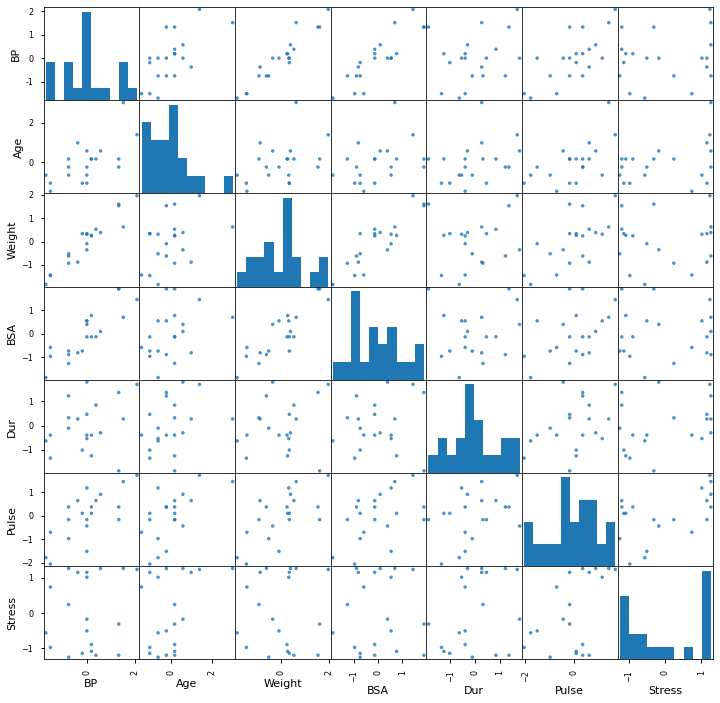

In [5]:
# We can also visualize correlations by plotting pairs of variables:
scatter_matrix(data, alpha=0.8, figsize=(12, 12), diagonal='hist');

In [6]:
y = data['BP'].values
variables = ['Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress']
X = data[variables].values

In [7]:
# Split into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=10)

In [8]:
# y for training set:
y_train

array([-0.75592895, -1.51185789,  0.37796447,  2.0788046 , -0.75592895,
       -0.18898224, -1.51185789,  1.51185789,  0.        ,  0.18898224,
        0.18898224, -1.70084013,  0.        , -0.37796447,  0.        ])

In [9]:
# y for test set:
y_test

array([-0.75592895,  0.        ,  1.32287566,  1.32287566,  0.56694671])

In [10]:
def fit_model(model, X_train, y_train, X_test, y_test):
    """Method for fitting a model and calculating R²"""
    model.fit(X_train, y_train)
    y_hat = {
        'train': model.predict(X_train),
        'test': model.predict(X_test),
    }
    r2 = {
        'train': r2_score(y_train, y_hat['train']),
        'test': r2_score(y_test, y_hat['test']),
    }
    return y_hat, r2


def add_xy_line(axi):
    """Add x=y line to a plot."""
    xlim = axi.get_xlim()
    ylim = axi.get_ylim()
    limits = min(xlim + ylim), max(xlim + ylim)
    axi.plot(limits, limits, color='black', ls=':')
    axi.set_xlim(xlim)
    axi.set_xlim(ylim)

R² (training) = 0.9973
R² (test) = 0.9844


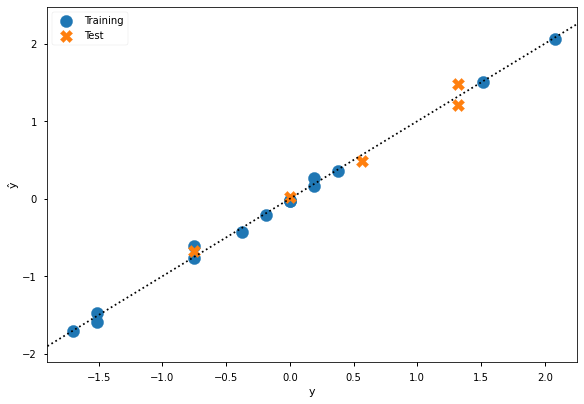

In [11]:
linear = LinearRegression(fit_intercept=False)
y_hat_linear, r2_linear = fit_model(linear, X_train, y_train, X_test, y_test)

# Plot measured vs. predicted:
fig_linear, ax_linear = plt.subplots(constrained_layout=True)
ax_linear.scatter(y_train, y_hat_linear['train'], label='Training', s=150)
ax_linear.scatter(y_test, y_hat_linear['test'], label='Test', s=150, marker='X')
ax_linear.set(xlabel='y', ylabel='ŷ')
ax_linear.legend()
add_xy_line(ax_linear)

# Print R²:
print(f"R² (training) = {r2_linear['train']:6.4f}")
print(f"R² (test) = {r2_linear['test']:6.4f}")

In [12]:
table_linear = pd.DataFrame.from_dict(
    {'b': linear.coef_, 'variable': variables}
)
table_linear

,b,variable
0,0.333320,Age
1,0.794886,Weight
2,0.081413,BSA
3,0.003754,Dur
4,-0.082582,Pulse
5,0.049052,Stress


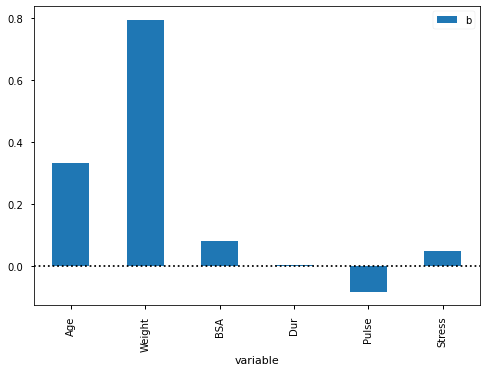

In [13]:
ax0 = table_linear.plot.bar(x='variable', y='b');
ax0.axhline(y=0, ls=':', color='black');

R² (training) = 0.9920
R² (test) = 0.9802


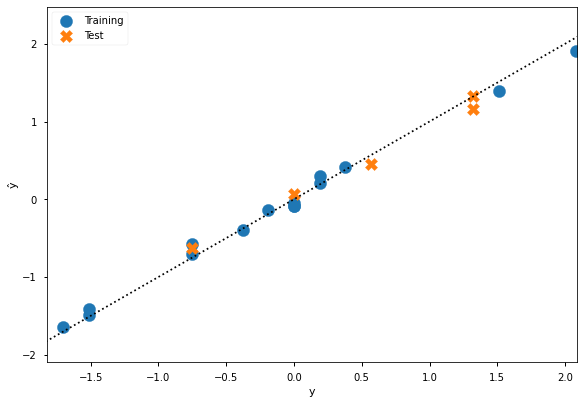

In [14]:
lasso = Lasso(alpha=0.05, fit_intercept=False)
y_hat_lasso, r2_lasso = fit_model(lasso, X_train, y_train, X_test, y_test)

# Plot measured vs. predicted:
fig_lasso, ax_lasso = plt.subplots(constrained_layout=True)
ax_lasso.scatter(y_train, y_hat_lasso['train'], label='Training', s=150)
ax_lasso.scatter(y_test, y_hat_lasso['test'], label='Test', s=150, marker='X')
ax_lasso.set(xlabel='y', ylabel='ŷ')
ax_lasso.legend()
add_xy_line(ax_lasso)

# Print R²:
print(f"R² (training) = {r2_lasso['train']:6.4f}")
print(f"R² (test) = {r2_lasso['test']:6.4f}")

In [15]:
table_lasso = pd.DataFrame.from_dict(
    {
        'b (least squares)': linear.coef_,
        'b (lasso)': lasso.coef_,
        'variable': variables,
    }
)
table_lasso

,b (least squares),b (lasso),variable
0,0.333320,0.295619,Age
1,0.794886,0.703170,Weight
2,0.081413,0.083217,BSA
3,0.003754,0.000000,Dur
4,-0.082582,0.000000,Pulse
5,0.049052,0.000000,Stress


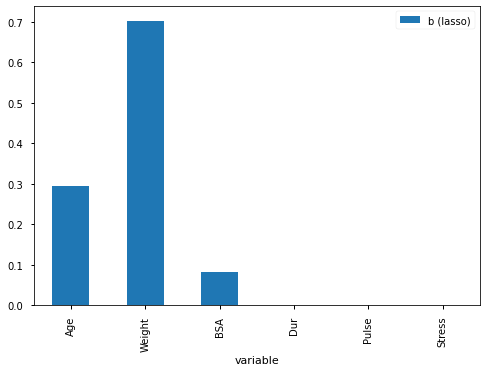

In [16]:
table_lasso.plot.bar(x='variable', y='b (lasso)');

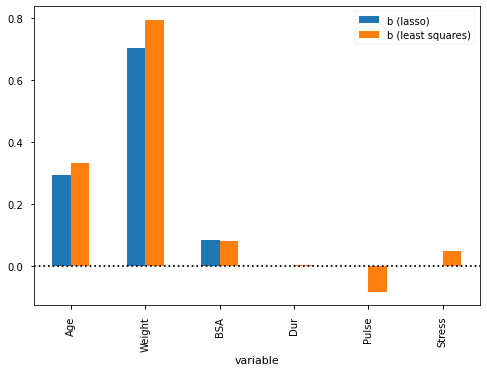

In [17]:
axl = table_lasso.plot.bar(x='variable', y=['b (lasso)', 'b (least squares)'])
axl.axhline(y=0, ls=':', color='black');

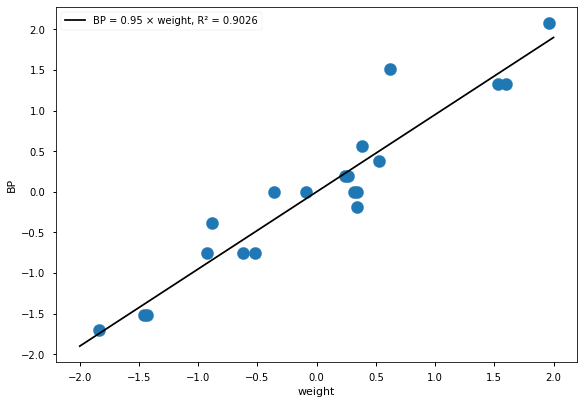

In [18]:
# We can also try manually to create a model with just one of the variables:
y = data['BP'].values
W = data[['Weight']].values
linear2 = LinearRegression(fit_intercept=False)
linear2.fit(W, y)
r2_linear2 = r2_score(y, linear2.predict(W))

fig_linear2, ax_linear2 = plt.subplots(constrained_layout=True)
ax_linear2.scatter(W, y, s=150)
ax_linear2.set(xlabel='weight', ylabel='BP')
x = np.array([-2, 2]).reshape(-1, 1)
y_p = linear2.predict(x)
ax_linear2.plot(x, y_p, color='black',
                label=f'BP = {linear2.coef_[0]:4.2f} × weight, R² = {r2_linear2:6.4f}')
ax_linear2.legend();